### Client Simulation

In [13]:
import base64
import requests
import json
import os

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

#### Creating Index

In [46]:
from elasticsearch import Elasticsearch

INDEX_NAME = "facenet"

client = Elasticsearch("http://localhost:9200",
                        # ca_certs="",
                        basic_auth=("elastic", "password"))

# client.indices.delete(index=INDEX_NAME)

client.indices.create(index=INDEX_NAME, 
                      mappings={"properties": {
                                    "image_vector": {
                                    "type": "dense_vector",
                                    "dims": 512,
                                    }}})



ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'facenet'})

#### Infer

In [50]:
img_file = 'data/id_is_2576.jpg'

In [56]:
with open(img_file, "rb") as f:
    im_bytes = f.read()        
im_b64 = base64.b64encode(im_bytes).decode("utf8")

headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
payload = json.dumps({"image": im_b64})

r = requests.post('http://localhost:8004/infer', data=payload, headers=headers)
res = json.loads(r.text)
print(res)

{'cos_id': ['2576'], 'cos_conf': [1.9352449], 'euc_id': ['2576'], 'euc_conf': [0.73775417], 'bb': [[104.1304931640625, 116.5423583984375, 244.15127563476562, 299.8322448730469]]}


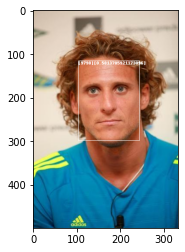

In [4]:
with Image.open(img_file) as im:
    for i, j in enumerate(res['cos_id']):
        draw = ImageDraw.Draw(im)
        draw.rectangle(res['bb'][i])
        draw.text((res['bb'][i][0],res['bb'][i][1]), str(j)+str(res['cos_conf'][i])) #Top left corner
    plt.imshow(im)
plt.show()

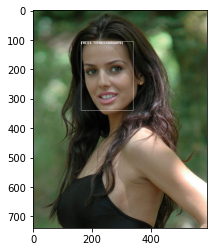

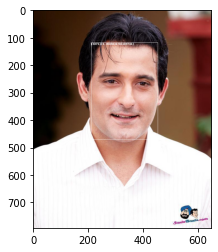

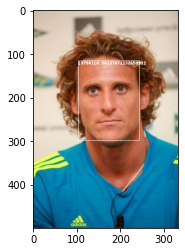

In [5]:
img_file_list = ['data/id_is_96.jpg', 'data/id_is_154.jpg', 'data/id_is_2576.jpg']

for img_file in img_file_list:
    with open(img_file, "rb") as f:
        im_bytes = f.read()        
    im_b64 = base64.b64encode(im_bytes).decode("utf8")

    headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
    payload = json.dumps({"image": im_b64})

    r = requests.post('http://localhost:8004/infer', data=payload, headers=headers)
    res = json.loads(r.text)
    with Image.open(img_file) as im:
        for i, j in enumerate(res['cos_id']):
            draw = ImageDraw.Draw(im)
            draw.rectangle(res['bb'][i])
            draw.text((res['bb'][i][0],res['bb'][i][1]), str(j)+str(res['cos_conf'][i])) #Top left corner
            plt.imshow(im)
        plt.show()

#### Generate

In [33]:
img_folder = './data/2576'
id = 2576

In [34]:
img_folder = os.path.join(img_folder, '')

In [35]:
img_list = []
for i in os.listdir(img_folder):
    with open(img_folder+i, "rb") as f:
        im_bytes = f.read()        
    im_b64 = base64.b64encode(im_bytes).decode("utf8")
    img_list.append({'image':im_b64})

In [48]:
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
payload = json.dumps({"id":id, "images": img_list})

r = requests.post('http://localhost:8004/generate', data=payload, headers=headers)

#### F1 Generate and Infer

In [57]:
import time
img_folder = './data/f1'

for person_id in os.listdir(img_folder):
    img_list = []
    for image in os.listdir(os.path.join(img_folder, person_id)):
        with open(f"{img_folder}/{person_id}/{image}", "rb") as f:
            im_bytes = f.read()   
        im_b64 = base64.b64encode(im_bytes).decode("utf8")
        img_list.append({'image':im_b64})

    headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
    payload = json.dumps({"id":person_id, "images": img_list})

    r = requests.post('http://localhost:8004/generate', data=payload, headers=headers)

{'cos_id': ['6437759', '243054'], 'cos_conf': [1.4420768, 1.390889], 'euc_id': ['6437759', '243054'], 'euc_conf': [0.48630178, 0.47534597], 'bb': [[351.1200866699219, 91.0444564819336, 485.9845886230469, 271.75482177734375], [756.4221801757812, 441.328125, 777.0237426757812, 465.85028076171875]]}


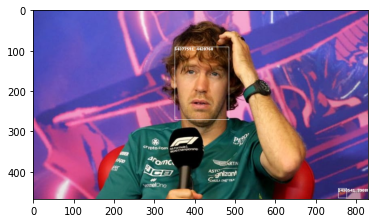

In [59]:
img_file = 'data/11_0.jpg'

with open(img_file, "rb") as f:
    im_bytes = f.read()        
im_b64 = base64.b64encode(im_bytes).decode("utf8")

headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
payload = json.dumps({"image": im_b64})

r = requests.post('http://localhost:8004/infer', data=payload, headers=headers)
res = json.loads(r.text)
print(res)

import matplotlib.pyplot as plt
with Image.open(img_file) as im:
    for i, j in enumerate(res['cos_id']):
        draw = ImageDraw.Draw(im)
        draw.rectangle(res['bb'][i])
        draw.text((res['bb'][i][0],res['bb'][i][1]), str(j)+str(res['cos_conf'][i])) #Top left corner
    plt.imshow(im)
plt.show()